### EDA on Rental Listings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.db_engine import DBEngine
db = DBEngine()
engine = db.get_engine()

2025-04-14 07:10:17,117 - INFO - Database engine created successfully.


In [2]:
rentals = pd.read_sql("SELECT listing_db_id, price FROM rental_listings", engine)

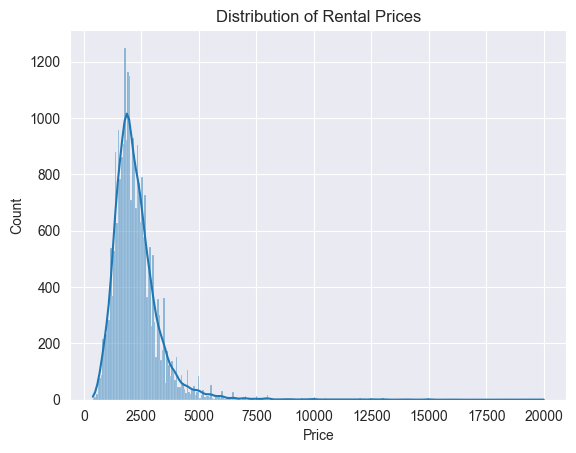

In [3]:
sns.histplot(rentals["price"], kde=True)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

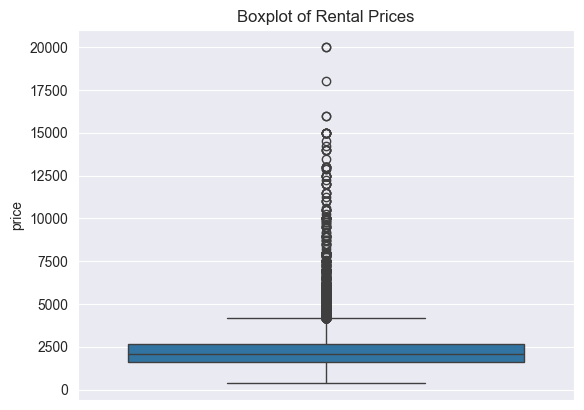

In [4]:
sns.boxplot(y="price", data=rentals)
plt.title("Boxplot of Rental Prices")
plt.show()

### Since Prices are significantly right-skewed, we will first apply Log Transformation

In [5]:
# check zero or negative
rentals.query("price <= 0")

,listing_db_id,price


In [6]:
rentals["price_log"] = np.log(rentals["price"])

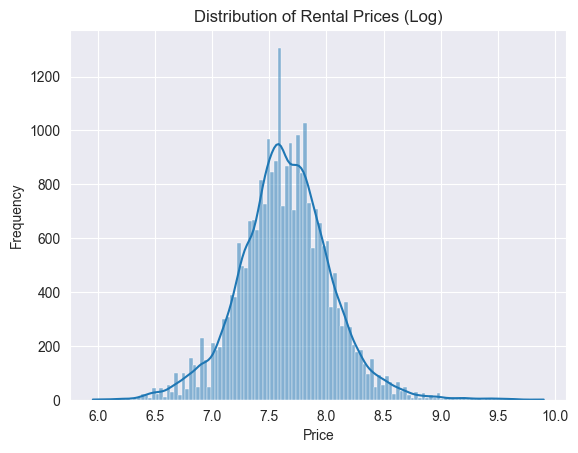

In [7]:
sns.histplot(rentals["price_log"], kde=True)
plt.title("Distribution of Rental Prices (Log)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

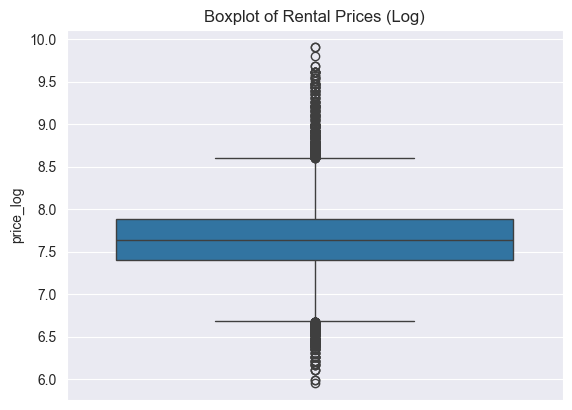

In [9]:
sns.boxplot(y="price_log", data=rentals)
plt.title("Boxplot of Rental Prices (Log)")
plt.show()

### Apply Standardization

In [12]:
rental_mean = rentals["price_log"].mean()
rental_std = rentals["price_log"].std()

rentals["price_log_standardized"] = (rentals["price_log"] - rental_mean) / rental_std

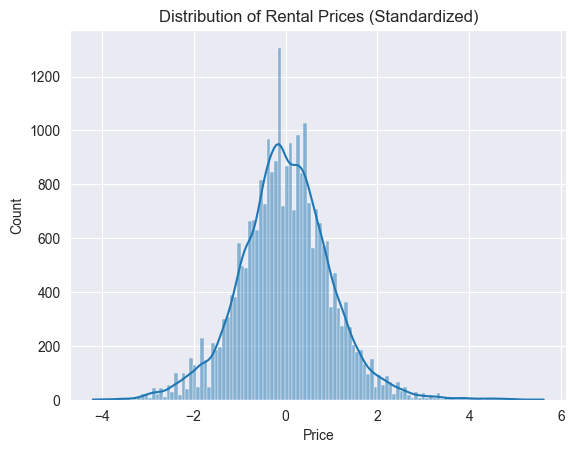

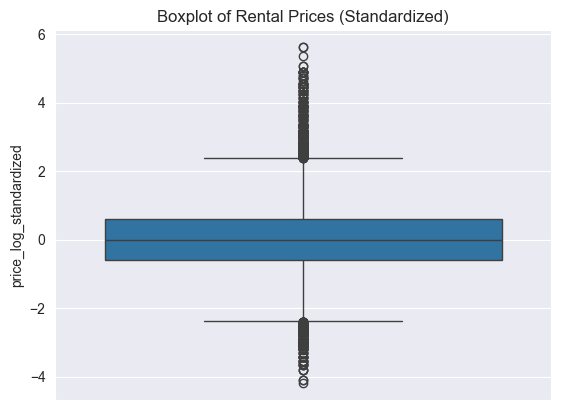

In [13]:
sns.histplot(rentals["price_log_standardized"], kde=True)
plt.title("Distribution of Rental Prices (Standardized)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

sns.boxplot(y=rentals["price_log_standardized"])
plt.title("Boxplot of Rental Prices (Standardized)")
plt.show()

Looks like price_log is close to normal distribution after standardization, so no further processing required

In [14]:
# Check for extreme values at the bounds:
print("Min value:", rentals["price_log_standardized"].min())
print("Max value:", rentals["price_log_standardized"].max())

lower_bound = rentals["price_log_standardized"].quantile(0.01)
upper_bound = rentals["price_log_standardized"].quantile(0.99)
print("Boundary", lower_bound, upper_bound)

Min value: -4.191826401001624
Max value: 5.617015052889924
Boundary -2.4706743854081923 2.6253631089104688


In [ ]:
# rentals["price_log_minmax_capped"] = rentals["price_log_minmax"].clip(lower=lower_bound, upper=upper_bound)
# sns.histplot(rentals["price_log_minmax_capped"], kde=True)
# plt.show()

### Conclusion 
we will preprocess rental prices as the following steps:
1. Log transform on rental prices
2. Standardization